<a href="https://colab.research.google.com/github/JesseK18/Cogntive_Neuroscience/blob/main/start1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding for COGNEURO


In [ ]:
! conda install -c conda-forge tensorflow


Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/ML_assignment_4

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-2.1.0              |     pyhd8ed1ab_0         105 KB  conda-forge
    astunparse-1.6.3           |     pyhd8ed1ab_2          18 KB  conda-forge
    flatbuffers-24.3.25        |       h6d0c2b6_0         1.4 MB
    gast-0.5.5                 |     pyhd8ed1ab_0          23 KB  conda-forge
    google-pasta-0.2.0         |     pyhd8ed1ab_1          48 KB  conda-forge
    grpcio-1.62.2              |  py311hab2016f_0        1023 KB
    h5py-3.12.1                |  py311ha611a00_0         1.3 MB
    keras-3.7.0                |     pyhd8ed1ab_0         932 KB  conda-forge
    libabseil-20240116.2  

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [6]:

digits_X = np.load('digits_X.npy')
digits_y = np.load('digits_y.npy')

# Print the first few rows to confirm the data
print(digits_X[:5])  # For large arrays, show only the first 5 rows
print(digits_y[:5])

# Reshape the feature matrix to 2D
digits_X_reshaped = digits_X.reshape(digits_X.shape[0], -1)

# Convert to DataFrame
df_X = pd.DataFrame(digits_X_reshaped)
df_y = pd.DataFrame(digits_y, columns=['Label'])
print("Shape of df_X:", df_X.shape)
print("Shape of df_y:", df_y.shape)
print(df_X.head(20))  # First 5 rows of the feature matrix

print(df_y.head(20))  # First 5 labels


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 2 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 1 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[0 1 2 3 4]
Shape of df_X: (290, 784)
Shape of df_y: (290, 1)
    0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2     0    0    0    0    0    0    0    1    1    0  .

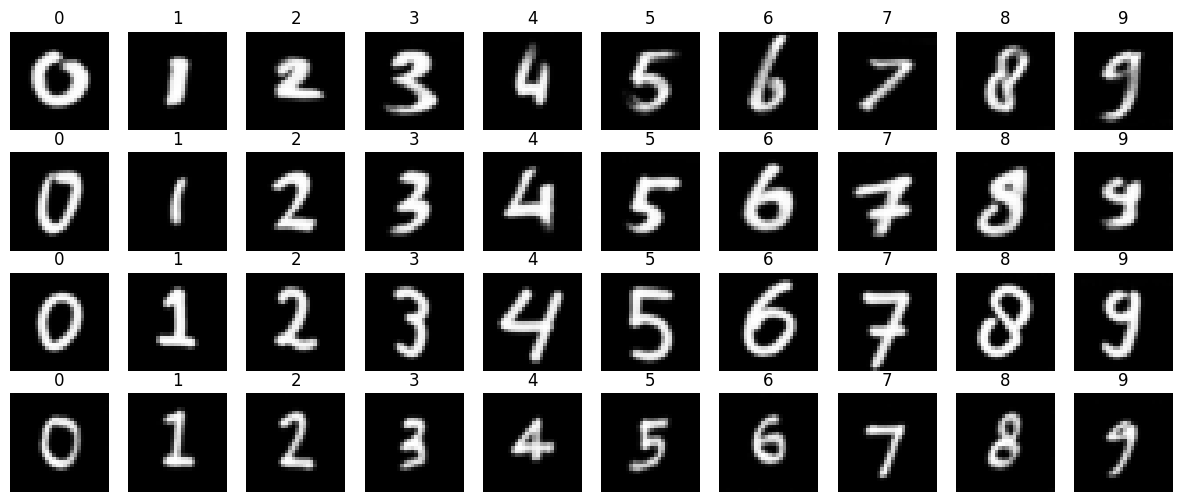

In [6]:

# load. Ensure you get the path correct -- this code assumes the files are in the working directory
X_test2 = np.load('./digits_X.npy')
y_test2 = np.load('./digits_y.npy')

# plot to see if loaded correctly
f, ax = plt.subplots(4,10, figsize=(15,6))
ax = ax.ravel()
for i in range(40):
    ax[i].imshow(X_test2[i,:,:], cmap='Greys_r')
    ax[i].set_title(y_test2[i])
    ax[i].axis('off')

In [7]:

# Define the model
model_1_hidden = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input
    Dense(128, activation='relu'),  # 1 hidden layer with 128 nodes
    Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 classes)
])

# Compile the model
model_1_hidden.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_1_hidden.summary()


# Define the model
model_3_hidden = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input
    Dense(128, activation='relu'),  # 1st hidden layer with 128 nodes
    Dense(64, activation='relu'),   # 2nd hidden layer with 64 nodes
    Dense(32, activation='relu'),   # 3rd hidden layer with 32 nodes
    Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 classes)
])

# Compile the model
model_3_hidden.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_3_hidden.summary()




# Define the model
model_1_conv = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 1 convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Flatten(),
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 classes)
])

# Compile the model
model_1_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_1_conv.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the data for convolutional networks
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Train the model
model_1_conv.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9112 - loss: 0.2976 - val_accuracy: 0.9795 - val_loss: 0.0665
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9827 - loss: 0.0551 - val_accuracy: 0.9839 - val_loss: 0.0493
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0332 - val_accuracy: 0.9859 - val_loss: 0.0443
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9938 - loss: 0.0211 - val_accuracy: 0.9873 - val_loss: 0.0402
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9954 - loss: 0.0141 - val_accuracy: 0.9866 - val_loss: 0.0462


In [13]:

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the training and testing data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data for fully connected networks
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Load external validation dataset
X_test2 = np.load('./digits_X.npy')
y_test2 = np.load('./digits_y.npy')

# Normalize and reshape the external validation dataset
X_test2 = X_test2 / 255.0
X_test2 = X_test2.reshape(-1, 28 * 28)

# Define a function to create the model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28 * 28,)),  # Flatten the input
        Dense(128, activation='relu'),   # First dense layer with 128 nodes
        Dropout(0.2),                    # Dropout regularization to prevent overfitting
        Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 classes)
    ])
    model.compile(
        optimizer=Adam(),
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,  # No horizontal flips for digit classification
    fill_mode='nearest'
)

# Fit the data augmentation generator to the training data
datagen.fit(X_train.reshape(-1, 28, 28, 1))  # Reshape to match expected 4D input for data augmentation

# Example: Train a convolutional model (assuming `model_1_conv` is predefined)
# model_1_conv.fit(datagen.flow(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=32),
#                  epochs=5, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test))

# Cross-validation with KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_accuracies = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_model()
    model.fit(X_train_fold, y_train_fold, epochs=5, verbose=0)  # Silent training

    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_accuracies.append(val_accuracy)

# Calculate the average validation accuracy
average_val_accuracy = np.mean(val_accuracies)
print(f'Average Validation Accuracy: {average_val_accuracy:.4f}')

# Final model training on full dataset
final_model = create_model()
final_model.fit(X_train, y_train, epochs=5, verbose=1)

# Evaluate on the external validation dataset
test_loss, test_accuracy = final_model.evaluate(X_test2, y_test2, verbose=1)
print(f'Test Accuracy on External Validation Dataset: {test_accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Average Validation Accuracy: 0.9733
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8622 - loss: 0.4750
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9547 - loss: 0.1532
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9672 - loss: 0.1093
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9734 - loss: 0.0833
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9775 - loss: 0.0728
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6205 - loss: 1.5305
Test Accuracy on External Validation Dataset: 0.5724
